In [39]:
import sys
from os import path



In [40]:
print(path.dirname( path.dirname( path.abspath("__file__") ) ))
sys.path.append(path.dirname( path.dirname( path.abspath("__file__") ) ))

/Volumes/DATA/Code/Daily_Coding/stock_analysis


In [41]:
from Invester.MarketDB import MarketDB

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
mk = MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
df = pd.DataFrame()


/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [44]:
for s in stocks:
    df[s] = mk.get_daily_price(s, '2016-01-04', '2018-04-27')['close']


/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.

In [45]:
df

,삼성전자,SK하이닉스,현대자동차,NAVER
date,,,,
2016-01-04,1205000,30150,144000,632000
2016-01-05,1208000,30600,143500,637000
2016-01-06,1175000,30750,140000,623000
2016-01-07,1163000,30200,137500,652000
2016-01-08,1171000,29700,136500,652000
...,...,...,...,...
2018-04-23,2595000,84400,159500,735000
2018-04-24,2523000,82100,162500,725000
2018-04-25,2520000,82400,164000,743000


In [46]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

port_ret = []
port_risk = []
port_weights = []

In [47]:
daily_ret

,삼성전자,SK하이닉스,현대자동차,NAVER
date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.002490,0.014925,-0.003472,0.007911
2016-01-06,-0.027318,0.004902,-0.024390,-0.021978
2016-01-07,-0.010213,-0.017886,-0.017857,0.046549
2016-01-08,0.006879,-0.016556,-0.007273,0.000000
...,...,...,...,...
2018-04-23,0.005424,0.000000,-0.003125,0.009615
2018-04-24,-0.027746,-0.027251,0.018809,-0.013605
2018-04-25,-0.001189,0.003654,0.009231,0.024828


In [48]:
annual_ret

삼성전자      0.383296
SK하이닉스    0.528546
현대자동차     0.079697
NAVER     0.099470
dtype: float64

In [49]:
daily_cov

,삼성전자,SK하이닉스,현대자동차,NAVER
삼성전자,0.000270,0.000166,-0.000009,0.000060
SK하이닉스,0.000166,0.000463,0.000018,0.000050
현대자동차,-0.000009,0.000018,0.000308,0.000043
NAVER,0.000060,0.000050,0.000043,0.000353


In [50]:
annual_cov

,삼성전자,SK하이닉스,현대자동차,NAVER
삼성전자,0.067946,0.041724,-0.002342,0.015076
SK하이닉스,0.041724,0.116797,0.004459,0.012703
현대자동차,-0.002342,0.004459,0.077648,0.010791
NAVER,0.015076,0.012703,0.010791,0.088908


In [53]:
# 몬테카를로 시뮬레이션

for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)                      # 4개의 랜덤 숫자의 합을 1로 만들기 위함.

    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)

portfolio = {'Returns': port_ret, "Risk": port_risk}
for i, s in enumerate(stocks):
    portfolio[s] = [weights[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk'] + [s for s in stocks]]

In [54]:
weights

array([0.08003116, 0.09730118, 0.2506156 , 0.57205206])

In [55]:
np.sum(weights)

1.0

In [56]:
returns

0.1589793314343401

In [59]:
portfolio

{'Returns': [0.24101842650700583,
  0.2531783623467003,
  0.1431019623417422,
  0.3206944245495849,
  0.396052233588876,
  0.2879829645832543,
  0.18942952633219587,
  0.2425735255354958,
  0.17472775519779427,
  0.3751272860414473,
  0.2833383665359649,
  0.30180990621601805,
  0.28231479191705655,
  0.31330209343739507,
  0.3277766685229976,
  0.27341042929868115,
  0.2710373134708147,
  0.311563080071122,
  0.34990326187359205,
  0.2934490299990097,
  0.29743428857639326,
  0.2833913229137961,
  0.231112303056216,
  0.2117068602169957,
  0.30745687468546007,
  0.34600140724691764,
  0.36538980452162306,
  0.3120597312990649,
  0.19456502642774406,
  0.2775753616281989,
  0.20830883240589917,
  0.2822225865737789,
  0.24345307035288194,
  0.22769105031407869,
  0.42056105894066403,
  0.32093025728902774,
  0.16968796524396307,
  0.2483408851292618,
  0.21083819200678494,
  0.24715330400803032,
  0.2988151253443964,
  0.375316974515436,
  0.26860574014827876,
  0.4000317017834572,
  0

In [61]:
df

,Returns,Risk,삼성전자,SK하이닉스,현대자동차,NAVER
0,0.241018,0.180854,0.080031,0.097301,0.250616,0.572052
1,0.253178,0.193707,0.080031,0.097301,0.250616,0.572052
2,0.143102,0.230594,0.080031,0.097301,0.250616,0.572052
3,0.320694,0.205856,0.080031,0.097301,0.250616,0.572052
4,0.396052,0.224835,0.080031,0.097301,0.250616,0.572052
...,...,...,...,...,...,...
59995,0.240338,0.180017,0.080031,0.097301,0.250616,0.572052
59996,0.331235,0.209545,0.080031,0.097301,0.250616,0.572052
59997,0.234136,0.176222,0.080031,0.097301,0.250616,0.572052
59998,0.302181,0.184842,0.080031,0.097301,0.250616,0.572052


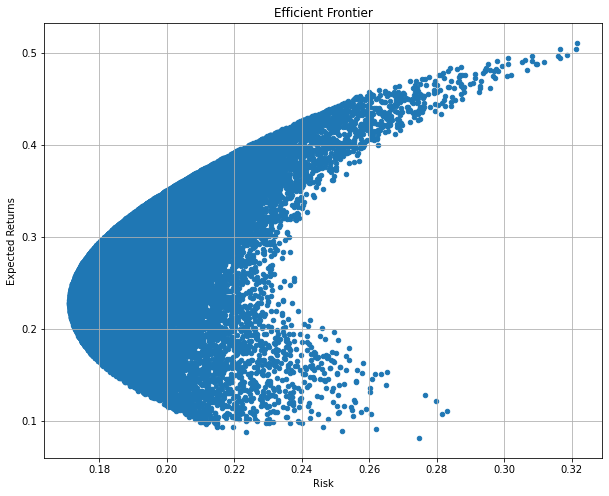

In [63]:
df.plot.scatter(x='Risk', y='Returns', figsize=(10, 8), grid=True)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()